In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [17]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [18]:
# Read csv files into dataframes
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# Remove columns PassengerId, Name, Ticket, and Cabin from the data set and then drop nulls
train_df = train_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]
train_df.dropna(inplace=True)

In [21]:
# Solit the dataset into x and y sets
train_df_X = train_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
train_df_Y = train_df[['Survived']]


In [22]:
train_df_Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [23]:
# Use train_test_learn to split the training data set into train and test sets
X_train_split, X_test_split, Y_train_split, Y_test_split = train_test_split(train_df_X,train_df_Y, test_size=0.33, random_state=42)

In [24]:
X_train_split.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [25]:
Y_train_split.dtypes

Survived    int64
dtype: object

array([[<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

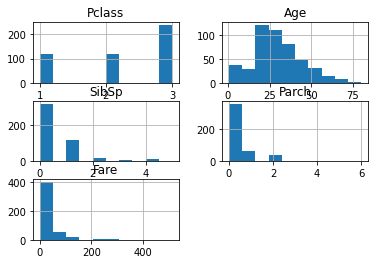

In [26]:
# Look at histograms
X_train_split.hist()

In [27]:
# Use OneHOtEncoder to replace categorical data with integers.  Separate column for each value
X_train_split = pd.get_dummies(X_train_split, columns=['Sex','Embarked'])
X_train_split.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
625,1,61.0,0,0,32.3208,0,1,0,0,1
465,3,38.0,0,0,7.0500,0,1,0,0,1
398,2,23.0,0,0,10.5000,0,1,0,0,1
608,2,22.0,1,2,41.5792,1,0,1,0,0
103,3,33.0,0,0,8.6542,0,1,0,0,1


In [34]:
# Replace categorical (string) variables with integers
X_test_split = pd.get_dummies(X_test_split, columns=['Sex','Embarked'])
X_test_split.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
641,1,24.0,0,0,69.3000,1,0,1,0,0
496,1,54.0,1,0,78.2667,1,0,1,0,0
262,1,52.0,1,1,79.6500,0,1,0,0,1
311,1,18.0,2,2,262.3750,1,0,1,0,0
551,2,27.0,0,0,26.0000,0,1,0,0,1


In [28]:
X_train_split.shape

(477, 10)

In [38]:
# Convert the response variable dataframes to strings
Y_train_split_list = Y_train_split['Survived']
Y_test_split_list = Y_test_split['Survived']
Y_test_split_list.shape

(235,)

In [32]:
# Create an instance of LogisticRegression and train it with the training data.  The only way I could get the model to work was to use the solver='liblinear'
# https://stackoverflow.com/questions/65682019/attributeerror-str-object-has-no-attribute-decode-in-fitting-logistic-regre
log_reg_model = LogisticRegression(solver='liblinear', random_state = 0).fit(X_train_split, Y_train_split_list)

In [40]:
# Predict Survivors for the test set using the trained model and calculate the r-squared.
predicted_Y = log_reg_model.predict(X_test_split)
log_reg_model.score(X_test_split,Y_test_split_list)

0.774468085106383